<a href="https://colab.research.google.com/github/AnaGutson/Analisis-Numerico/blob/main/Num%C3%A9rico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo Practico N°1 - Análisis Numérico**

## **$\textrm{Integrantes}$**


- $\textrm{Pinto, Nicolas} - 105064$ 
- $\textrm{Craviotto, Mateo} - 106255$ 
- $\textrm{Gutson, Ana Gabriela} - 105853$ 
- $\textrm{Balmaceda, Fernando} - 105525$

## **$\textrm{Bibliotecas a utilizar}$**


In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from sympy import *
init_printing(use_unicode=True)

##**2.** $\textrm{Interpolacion por Spline}$


$\textrm{La tabla 1 contiene las muestras obtenidas de las 3 curvas mostrada en la figura 2.1.}$
$\textrm{Se desea interpolar dichas muestras utilizando 3 splines con frontera ligada.}$
$\textrm{Se deben desarrollar los siguientes puntos:}$

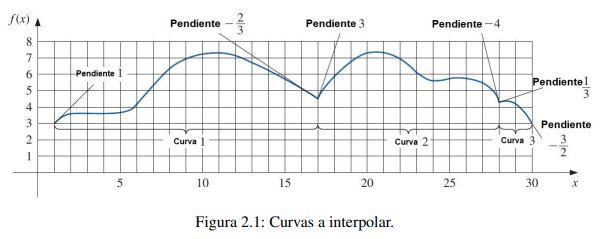

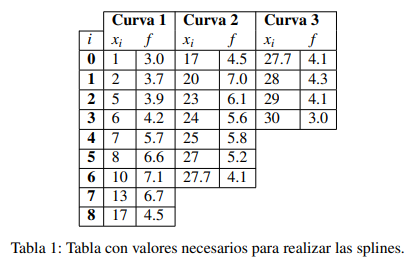

###$\quad$ **a)** $\textrm{Plantear el problema de interpolacion con Spline con frontera ligada.}$ $\textrm{Asuma que los coeficientes de los terminos independientes, lineales}$ $\textrm{cuadraticos y cubicos son de la forma } a_i, b_i, c_i, d_i, \textrm{respectivamente.}$

La forma más común de aproximar polinomialmente por tramos es la **interpolación de Spline Cúbico**.

**Condiciones**

Dada la función _$f$_ definida en $\begin{bmatrix}a, & b\end{bmatrix}$ y el conjunto de nodos $a = x_0 < x_1< \dots < x_n = b$, las condiciones que se deben cumplir para construir un spline cubico $S$ para _$f$_ son: 
  
\begin{aligned}
&i. &&  S_j(x) \textrm{ es un polinomio cubico en el subintervalo} \begin{bmatrix}x_j,&x_{j+1} \end{bmatrix} &\textrm{ para cada } j = 0, 1, \dots, n-1;\\
&ii. && S_j(x_j) = f(x_j) \quad  y \quad S_j(x_{j+1}) = f(x_{j+1}) &\textrm{ para cada } j = 0, 1, \dots, n-1;\\
&iii. && S_{j+1}(x_{j+1}) = S_j(x_{j+1}) &\textrm{ para cada } j = 0, 1, \dots, n-2;\\
&iv. && S'_{j+1}(x_{j+1}) = S_j'(x_{j+1}) &\textrm{ para cada } j = 0, 1, \dots, n-2;\\
&v.  && S''_{j+1}(x_{j+1}) = S''_j(x_{j+1}) &\textrm{ para cada } j = 0, 1, \dots, n-2;\\
&vi.  && S'(x_0) = f'(x_0) \quad  y \quad S'(x_n) = f'(x_n).\\
\end{aligned}

El conjunto de condiciones garantizan no solo que el interpolante es continuamente diferenciable en el intervalo, sino también que tiene una segunda derivada continua. Aún así, no supone que las derivadas del interpolante concuerdan con las de la función en su aproximación, incluso en los nodos. 

La última condición se debe a que se construirá un Spline Cúbico cuya frontera es ligada. Al trabajar con una frontera de este tipo, se obtendrá una aproximación más precisa que al trabajar con frontera natural.

Construir un spline de frontera ligada solo es posible si se cuenta con el valor de la derivada en los extremos de _$f$_. De no poseer esta información, se tendría que construir un Spline de frontera natural. En ese caso, la condición $vi.$ sería: 
$$vi. \quad  S''(x_0) = S''(x_n) = 0.$$



**Condición $i.$**

Para construir el spline cúbico $S$ que se interpola para la función $f$, las condiciones anteriormente mencionadas se aplican a los polinomios cúbicos
$$S_j(x) = a_j + b_j (x-x_j) + c_j (x-x_j)^2 + d_j (x-x_j)^3$$ 

cada uno en el subintervalo $\begin{bmatrix}x_j, & x_{j+1}\end{bmatrix}$ para cada $j = 0, 1, \dots, n-1$, siendo $n =$ cantidad de nodos$ - 1$.

Como se puede apreciar, para cada $S_j(x)$ será necesario determinar 4 constantes. Es decir, para construir un spline definido en un intervalo que se ha subdividido en $n$ subintervalos se tendrán que determinar $4n$ constantes.

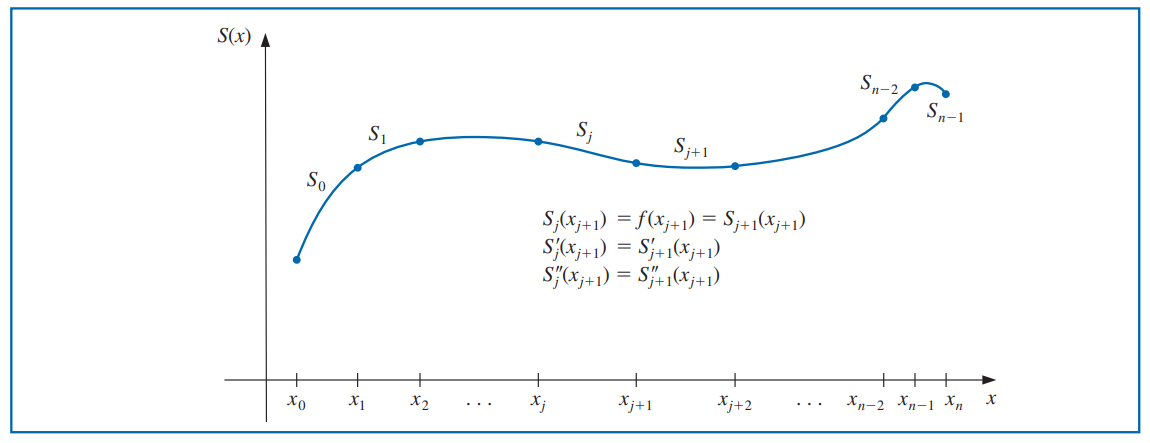

### $\quad$**b)** $\textrm{Mostrar las ecuaciones que permiten obtener los coeficientes de las 3 splines.}$  

### $\textrm{En particular, obtenga el sistema lineal de la forma }$ $A·x = b,$ $\textrm{ donde}$ $x$ $\textrm{es el vector de coeficientes correspondientes a los terminos cuadraticos de dichas splines.}$

### $\textrm{Es decir, }$ $x = \begin{bmatrix} c_0 & c_1 & c_2 & \dots \end{bmatrix}^T.$ 

Se tienen $n$ curvas de la forma $S_j(x) = a_j + b_j(x-x_j) + c_j(x-x_j)^2 + d_j(x-x_j)^3$ para cada $j = 0, 1, \dots, n-1$.

Se tienen, entonces, $4n$ constantes a determinar. Para eso, se recurren a las condiciones planteadas anteriormente.

#### $\textrm{Condicion $ii.$}$



Para empezar, los splines deben concordar con los datos en los nodos. Se plantean las siguientes dos ecuaciones generales:

- $S_j(x_j) = f(x_j)$

Se plantea la primera parte:

\begin{aligned}
S_j(x_j) &= a_j + b_j(x_j-x_j) + c_j(x_j-x_j)^2 + d_j(x_j-x_j)^3 \\
&= a_j + b_j(0) + c_j(0)^2 + d_j(0)^3 \\
&= a_j
\end{aligned}

Y a su vez, esto es igual a $f(x_j)$. Por ende,

$ \quad \Rightarrow \quad S_j(x_j) = a_j = f(x_j) $ para cada $j = 0, 1, \dots, n-1.$

- $S_j(x_{j+1}) = f(x_{j+1})$

Se plantea la primera parte:

$$S_j(x_{j+1}) = a_j + b_j(x_{j+1}-x_j) + c_j(x_{j+1}-x_j)^2 + d_j(x_{j+1}-x_j)^3$$

Y a su vez, esto es igual a $f(x_{j+1})$. Por ende,

$ \quad \Rightarrow \quad S_j(x_{j+1}) = a_j + b_j(x_{j+1}-x_j) + c_j(x_{j+1}-x_j)^2 + d_j(x_{j+1}-x_j)^3 = f(x_{j+1})$ para cada $j = 0, 1, \dots, n-1.$

#### $\textrm{Condicion $iii.$}$



Se sabe, además, que las curvas deben coincidir en los bordes:
$$S_{j+1}(x_{j+1}) = S_j(x_{j+1})$$

Con el planteo anterior se concluyó que $S_{j+1}(x_{j+1}) = a_{j+1}$, y que además $S_j(x_{j+1}) = a_j + b_j(x_{j+1}-x_j) + c_j(x_{j+1}-x_j)^2 + d_j(x_{j+1}-x_j)^3$.

Se puede decir entonces que:

$ \quad \Rightarrow \quad a_{j+1} = S_{j+1}(x_{j+1}) = S_j(x_{j+1}) = a_j + b_j(x_{j+1}-x_j)+c_j(x_{j+1}-x_j)^2 + d_j(x_{j+1}-x_j)^3$ para cada $j = 0, 1, \dots, n-2.$


#### $\textrm{Condicion $iv$.}$



Se plantea la igualdad de las derivada de primer orden de las curvas en los bordes:
$$S'_{j+1}(x_{j+1}) = S_j'(x_{j+1})$$

Se desarrolla:

\begin{aligned}
S'_{j+1}(x_{j+1}) &= b_{j+1} + 2c_{j+1}(x_{j+1}-x_{j+1})+3d_{j+1}(x_{j+1}-x_{j+1})^2 \\
&= b_{j+1} + 2c_{j+1}(0)+3d_{j+1}(0)^2 \\
&= b_{j+1}
\end{aligned}

Entonces, $S'_{j+1}(x_{j+1}) = b_{j+1}$.

A su vez:

\begin{aligned}
S'_j(x_{j+1}) &= b_j + 2c_j(x_{j+1}-x_j)+3d_j(x_{j+1}-x_j)^2
\end{aligned}

Se concluye entonces:

$ \quad \Rightarrow \quad b_{j+1} = b_j + 2c_j(x_{j+1}-x_j)+3d_j(x_{j+1}-x_j)^2$ para cada $j = 0, 1, \dots, n-1.$

#### $\textrm{Condicion $v.$}$



Se plantea la igualdad de la derivada de segundo orden de las curvas en los bordes:
$$S''_{j+1}(x_{j+1}) = S_j''(x_{j+1})$$

Se desarrolla:

\begin{aligned}
S''_{j+1}(x_{j+1}) &= 2c_{j+1} + 6d_{j+1}(x_{j+1}-x_{j+1})\\
&= 2c_{j+1} + 6d_{j+1}(0)\\
&= 2c_{j+1}
\end{aligned}

Entonces, $S''_{j+1}(x_{j+1}) = 2c_{j+1}$.

A su vez:

\begin{aligned}
S''_j(x_{j+1}) &= 2c_j + 6d_j(x_{j+1}-x_j)
\end{aligned}

Se plantea la igualdad: $2c_{j+1} = 2c_j + 6d_j(x_{j+1}-x_j)$.

Se despeja $c_{j+1}$

$ \quad \Rightarrow \quad c_{j+1} = c_j + 3d_j(x_{j+1}-x_j)$ para cada $j = 0, 1, \dots, n-1.$

#### $\textrm{Pasaje en limpio de las ecuaciones}$

Se pasan en limpio las ecuaciones previamente obtenidas, las cuales permiten la construcción de un Spline Cúbico genérico, ya que aún no han sido aplicadas las condiciones de borde.

Se pasa en limpio lo obtenido a partir de las **condiciones** $iii.$, $iv.$ y $v.$:

> **($1$)** $\quad a_{j+1} = a_j + b_j(x_{j+1}-x_j)+c_j(x_{j+1}-x_j)^2 + d_j(x_{j+1}-x_j)^3$
>
> **($2$)** $\quad b_{j+1} = b_j + 2c_j(x_{j+1}-x_j)+3d_j(x_{j+1}-x_j)^2$
>
> **($3$)** $\quad c_{j+1} = c_j + 3d_j(x_{j+1}-x_j)$

Se resuelve el sistema buscando que quede todo en funcion de $\{c_j\}_{j = 0}^n$.

Se despeja $d_j$ de **($3$)**
> $d_j = \frac{(c_{j+1} - c_j)}{3(x_{j+1}-x_j)}$

Se procede a reemplazar $d_j$ en **($1$)** y **($2$)**.

- Se reemplaza $d_j$ en **($1$)**

\begin{aligned}
a_{j+1} &= a_j + b_j(x_{j+1}-x_j) + c_j(x_{j+1}-x_j)^2 + \frac{(c_{j+1} - c_j)}{3(x_{j+1}-x_j)}(x_{j+1}-x_j)^3 \\
&= a_j + b_j(x_{j+1}-x_j) + c_j(x_{j+1}-x_j)^2 + \frac{(c_{j+1} - c_j)(x_{j+1}-x_j)^2}{3} \\
&= a_j + b_j(x_{j+1}-x_j) + \frac{(3c_j + c_{j+1} - c_j)(x_{j+1}-x_j)^2}{3} \\
&= a_j + b_j(x_{j+1}-x_j) + \frac{(2c_j + c_{j+1})(x_{j+1}-x_j)^2}{3} \\
\end{aligned}

Se agrega una nueva ecuación:

> **($4$)** $\quad a_{j+1} = a_j + b_j(x_{j+1}-x_j) + \frac{(2c_j + c_{j+1})(x_{j+1}-x_j)^2}{3}.$

- Ahora se reemplaza $d_j$ en **($2$)**

\begin{aligned}
b_{j+1} &= b_j + 2c_j(x_{j+1}-x_j)+3\frac{(c_{j+1} - c_j)}{3(x_{j+1}-x_j)}(x_{j+1}-x_j)^2 \\
&= b_j + 2c_j(x_{j+1}-x_j) + (c_{j+1} - c_j)(x_{j+1}-x_j) \\
&= b_j + (2c_j + c_{j+1} - c_j)(x_{j+1}-x_j) \\
&= b_j + (c_j + c_{j+1})(x_{j+1}-x_j) \\
\end{aligned}

A esta ecuación, se le reduce en $1$ el índice:

> **($5$)** $\quad b_{j} = b_{j-1} + (c_{j-1} + c_j)(x_j-x_{j-1}).$

Se despeja $b_j$ de **($4$)**

> **($6$)** $\quad b_j = \frac{a_{j+1}-a_j}{x_{j+1}-x_j} - \frac{(x_{j+1}-x_j)(2c_j + c_{j+1})}{3}$

Y se reduce en $1$ el índice, tal que

> **($7$)** $\quad b_{j-1} = \frac{a_j-a_{j-1}}{x_j-x_{j-1}} - \frac{(x_j-x_{j-1})(2c_{j-1} + c_j)}{3}$


Ahora, a partir de lo obtenido en **($6$)** y **($7$)**, se reescribe **($5$)**.

\begin{aligned}
b_j &= b_{j-1} + (c_{j-1} + c_j)(x_j-x_{j-1}) \\
\frac{a_{j+1}-a_j}{x_{j+1}-x_j} - \frac{(x_{j+1}-x_j)(2c_j + c_{j+1})}{3} &= \frac{a_j-a_{j-1}}{x_j-x_{j-1}} - \frac{(x_j-x_{j-1})(2c_{j-1} + c_j)}{3} + (c_{j-1} + c_j)(x_j-x_{j-1}) \\
\frac{a_{j+1}-a_j}{x_{j+1}-x_j} - \frac{a_j-a_{j-1}}{x_j-x_{j-1}} &= \frac{(x_j-x_{j-1})(-2c_{j-1} - c_j)}{3} + (c_{j-1} + c_j)(x_j-x_{j-1}) + \frac{(x_{j+1}-x_j)(2c_j + c_{j+1})}{3}\\
3\frac{a_{j+1}-a_j}{x_{j+1}-x_j} - 3\frac{a_j-a_{j-1}}{x_j-x_{j-1}} &= (x_j-x_{j-1})(-2c_{j-1} - c_j) + 3(c_{j-1} + c_j)(x_j-x_{j-1}) + (x_{j+1}-x_j)(2c_j + c_{j+1})\\
3\frac{a_{j+1}-a_j}{x_{j+1}-x_j} - 3\frac{a_j-a_{j-1}}{x_j-x_{j-1}} &= (x_j-x_{j-1})(c_{j-1} + 2c_j)+ (x_{j+1}-x_j)(2c_j + c_{j+1})\\
3\frac{a_{j+1}-a_j}{x_{j+1}-x_j} - 3\frac{a_j-a_{j-1}}{x_j-x_{j-1}} &= (x_j-x_{j-1})c_{j-1} + (x_j-x_{j-1})2c_j+ (x_{j+1}-x_j)2c_j + (x_{j+1}-x_j)c_{j+1}\\
\end{aligned}

para $j = 1, 2, \dots, n - 1$ .

Se obtiene entonces una nueva ecuación:

> **($8$)** $\quad (x_j-x_{j-1})c_{j-1} + 2c_j[(x_j-x_{j-1}) + (x_{j+1}-x_j)] + (x_{j+1}-x_j)c_{j+1} = 3\frac{a_{j+1}-a_j}{x_{j+1}-x_j} - 3\frac{a_j-a_{j-1}}{x_j-x_{j-1}}$

Esta ecuación tiene como incógnitas los $\{c_j\}^n_{j = 0}$, dado que tanto $a_j$ como $x_j$ ya fueron encontrados previamente.

#### $\textrm{Condicion $vi.$}$

Se imponen, finalmente, las condiciones de frontera.


- $S_0'(x_0) = f'(x_0)$

Se plantea la primera parte:

\begin{aligned}
S'_0(x_0) &= b_0 + 2c_0(x_0-x_0) + 3d_0(x_0-x_0)^2 \\
&= b_0 + 2c_0(0) + 3d_0(0)^2 \\
&= b_0
\end{aligned}

Y a su vez, esto es igual a $f'(x_0)$. Por ende,

$ \quad \Rightarrow \quad S_0'(x_0) = b_0 = f'(x_0).$

Se reemplaza lo obtenido en **($6$)** con $j = 0$ y se obtiene:

\begin{aligned}
f'(x_0) &= \frac{a_1-a_0}{x_1-x_0} - \frac{(x_1-x_0)(2c_0 + c_1)}{3}\\
3f'(x_0) &= 3\frac{a_1-a_0}{x_1-x_0} - (x_1-x_0)(2c_0 + c_1)\\
3f'(x_0) &= 3\frac{a_1-a_0}{x_1-x_0} - (x_1-x_0)2c_0 - (x_1-x_0)c_1\\
\end{aligned}

Se obtiene entonces la siguiente ecuación:

> **($9$)** $\quad 2(x_1-x_0)c_0 +(x_1-x_0)c_1 = 3\frac{a_1-a_0}{x_1-x_0} - 3f'(x_0)$

- $S_{n-1}'(x_n) = f'(x_n)$

Se plantea la primera parte:

$$S_{n-1}'(x_n) = b_{n-1} + 2c_{n-1}(x_n-x_{n-1}) + 3d_{n-1}(x_n-x_{n-1})^2$$

Y anteriormente se obtuvo que
$$d_j = \frac{(c_{j+1} - c_j)}{3(x_{j+1}-x_j)}$$

Por ende, 

\begin{aligned}
S_{n-1}'(x_3) &= b_{n-1} + 2c_{n-1}(x_n-x_2) + 3\frac{c_n - c_{n-1}}{3(x_n-x_{n-1})}(x_n-x_2)^2 \\
&= b_{n-1} + 2c_{n-1}(x_n-x_{n-1}) + (c_n - c_{n-1})(x_n-x_{n-1}) \\
&= b_{n-1} + (c_{n-1} + c_n)(x_n-x_{n-1})
\end{aligned}

Y a su vez, esto es igual a $f'(x_n)$. Por ende,

$ \quad \Rightarrow \quad S_{n-1}'(x_n) = b_{n-1} + (c_{n-1} + c_n)(x_n-x_{n-1}) = f'(x_n).$

Se despeja $b_{n-1}$:

$$b_{n-1} + (c_{n-1} + c_n)(x_n-x_{n-1}) = f'(x_n)$$
$$b_{n-1} = f'(x_n) - (c_{n-1} + c_n)(x_n-x_{n-1})$$

Se reemplaza $b_{n-1}$ en **($6$)** con $j = (n-1)$ y se obtiene:

\begin{aligned}
f'(x_n) - (c_{n-1} + c_n)(x_n-x_{n-1}) &= \frac{a_n-a_{n-1}}{x_n-x_{n-1}} - \frac{(x_n-x_{n-1})(2c_{n-1} + c_n)}{3}\\
f'(x_n) &= \frac{a_n-a_{n-1}}{x_n-x_{n-1}} + \frac{(x_n-x_{n-1})(-2c_{n-1} - c_n)}{3} + (c_{n-1} + c_n)(x_n-x_{n-1})\\
f'(x_n) &= \frac{a_n-a_{n-1}}{x_n-x_{n-1}} + \frac{(x_n-x_{n-1})(-2c_{n-1} - c_n + 3c_{n-1} + 3c_n)}{3}\\
f'(x_n) &= \frac{a_n-a_{n-1}}{x_n-x_{n-1}} + \frac{(x_n-x_{n-1})(c_{n-1} + 2c_n)}{3}\\
3f'(x_n) &= 3\frac{a_n-a_{n-1}}{x_n-x_{n-1}} + (x_n-x_{n-1})c_{n-1} + (x_n-x_{n-1})2c_n\\
\end{aligned}


Se obtiene entonces la siguiente ecuación:

> **($10$)** $\quad (x_n-x_{n-1})c_{n-1} + 2(x_n-x_{n-1})c_n = 3f'(x_n) - 3\frac{a_n-a_{n-1}}{x_n-x_{n-1}}$

#### $\textrm{Sistema Lineal}$

Se juntan las ecuaciones **($9$)**, **($8$)** y **($10$)**. Es decir,

- $2(x_1-x_0)c_0 +(x_1-x_0)c_1 = 3\frac{a_1-a_0}{x_1-x_0} - 3f'(x_0).$
- $(x_j-x_{j-1})c_{j-1} + 2c_j[(x_j-x_{j-1}) + (x_{j+1}-x_j)] + (x_{j+1}-x_j)c_{j+1} = 3\frac{a_{j+1}-a_j}{x_{j+1}-x_j} - 3\frac{a_j-a_{j-1}}{x_j-x_{j-1}} \quad$ para cada $j = 0, 1, \dots, n-1.$
- $(x_n-x_{n-1})c_{n-1} + 2(x_n-x_{n-1})c_n = 3f'(x_n) - 3\frac{a_n-a_{n-1}}{x_n-x_{n-1}}.$ 

Y se plantea el siguiente sistema lineal: 

$$
  \left\{ \begin{array}{lcc}
              2(x_1-x_0) c_0 +(x_1-x_0)c_1 = 3\frac{a_1-a_0}{x_1-x_0} - 3f'(x_0) \\
              (x_1-x_0) c_0 + 2[(x_1-x_0) + (x_2-x_1)] c_1 + (x_2-x_1) c_2 = 3\frac{a_2-a_1}{x_2-x_1} - 3\frac{a_1-a_0}{x_1-x_0} \\
              (x_2-x_1) c_1 + 2[(x_2-x_1) + (x_3-x_2)] c_2 + (x_3-x_2)c_3 = 3\frac{a_3-a_2}{x_3-x_2} - 3\frac{a_2-a_1}{x_2-x_1} \\
              \quad\dots \\
              (x_{n-1}-x_{n-2}) c_{n-2} + 2[(x_{n-1}-x_{n-2}) + (x_n-x_{n-1})] c_{n-1} + (x_n-x_{n-1})c_n = 3\frac{a_n-a_{n-1}}{x_n-x_{n-1}} - 3\frac{a_{n-1}-a_{n-2}}{x_{n-1}-x_{n-2}} \\
              (x_n-x_{n-1}) c_{n-1} + 2(x_n-x_{n-1}) c_n = 3f'(x_n) - 3\frac{a_n-a_{n-1}}{x_n-x_{n-1}}
          \end{array}
  \right.
$$

Se coloca la información en las matrices A y b, para así resolver el sistema lineal de ecuaciones $Ax = b$.

$A$ resulta en la matriz

$$\begin{bmatrix}
    2(x_1-x_0) & (x_1-x_0) & 0 & \dots & \dots & \dots & 0\\
  (x_1-x_0) & 2[(x_1-x_0)+(x_2-x_1)] & (x_2-x_1) &0 & \dots & \dots & 0\\
    0 & (x_2-x_1) &  2[(x_2-x_1)+(x_3-x_2)] & (x_3-x_2) &0 & \dots & 0\\
    \dots&\dots&\dots&\dots&\dots&\dots & \dots\\
    0 & \dots& \dots & 0 & (x_{n-1}-x_{n-2}) & 2[(x_{n-1}-x_{n-2})+(x_n-x_{n-1})] & (x_n - x_{n-1}) \\
    0 & \dots & \dots &\dots & 0 & (x_n-x_{n-1}) & 2(x_n-x_{n-1})
  \end{bmatrix}
$$ 

  $$b = \begin{bmatrix}
  3\frac{a_1-a_0}{x_1-x_0} - 3f'(x_0) \\
  3\frac{a_2-a_1}{x_2-x_1} - 3\frac{a_1-a_0}{x_1-x_0} \\
  3\frac{a_3-a_2}{x_3-x_2} - 3\frac{a_2-a_1}{x_2-x_1} \\
  \dots \\
  3\frac{a_n-a_{n-1}}{x_n-x_{n-1}} - 3\frac{a_{n-1}-a_{n-2}}{x_{n-1}-x_{n-2}} \\
  3f'(x_n) - 3\frac{a_n-a_{n-1}}{x_n-x_{n-1}}
  \end{bmatrix},$$

  $$x = \begin{bmatrix}
  c_0 \\
  c_1 \\
  c_2 \\
  \vdots\\
  c_{n-1}\\
  c_n
  \end{bmatrix}.$$

   

### $\quad$**c)** $\textrm{Desarrollar el seudocodigo del algoritmo de interpolacion con Spline ligada}$ $\textrm{en base a lo explicado en los dos puntos anteriores}.$

In [ ]:
from sympy import *
init_printing(use_unicode=True)
import numpy as np

#### $\textrm{Implementacion - Forma 1}$

A partir de lo concluído previamente, se propone la siguiente implementación para hallar el polinomio interpolante.


Se cuenta con la clase **SplineCubico**, la cual se inicializa con $4$ valores:
- $nodos:$ la coordenada "$x$" de los puntos a interpolar.
- $imagen\_nodos:$ la coordenada "$y$" de los puntos a interpolar.
- $fpo:$ la derivada primera de $f(x_0)$.
- $fpn:$ la derivada primera de $f(x_n)$. 

Para generar el spline, se llama al método $construir\_spline\_cubico()$. Éste devuelve los coeficientes $a$, $b$, $c$ y $d$.

En caso de querer visualizar los $S_j$, se invoca el método $obtener\_Sj$ enviándole como parámetro el _j_ a utilizar.

Y finalmente, en caso de querer visualizar todos los $S_j$, se utiliza el método $obtener\_todos\_los\_Sj().$

In [ ]:
class SplineCubico():
  
  #Se inicializa un interpolador cuyos atributos son:
  # • nodos: la coordenada "x" de los puntos a interpolar.
  # • imagen_nodos: la coordenada "y" de los puntos a interpolar.
  # • fpo: la derivada primera de f(x0).
  # • fpn: la derivada primera de f(xn).
  def __init__(self, nodos, imagen_nodos, fpo, fpn):

    self.a = imagen_nodos
    self.x = nodos
    self.n = len(nodos)

    self.fpo = fpo
    self.fpn = fpn

    self.b = [None] * (self.n-1)
    self.c = [None] * (self.n)
    self.d = [None] * (self.n-1)

    #uso h_j = x_{j+1} - x_j para facilitar la notación
    self.h = [None] * (self.n - 1)
    for i in range(self.n - 1):
      self.h[i] = self.x[i+1] - self.x[i]

  def construir_A(self):
    
    #Matriz de 0s
    A = zeros(self.n)

    #Primera fila
    A[0,0] = 2*self.h[0]
    A[0,1] = self.h[0]

    #Resto de filas menos la última
    for i in range(self.n-2):
      A[i+1,i] = self.h[i]
      A[i+1,i+1] = 2*(self.h[i]+self.h[i+1])
      A[i+1,i+2] = self.h[i+1]

    #Ultima fila
    A[self.n-1, self.n-2] = self.h[self.n-2]
    A[self.n-1, self.n-1] = 2*self.h[self.n-2]

    return A


  def construir_b(self):
    tope = self.n - 1
    b = Matrix([3*(self.a[1]-self.a[0])/self.h[0] - 3*self.fpo])
    for i in range(tope-1):
      b = Matrix.vstack(b, Matrix([3*(self.a[i+2]-self.a[i+1])/self.h[i+1] - 3*(self.a[i+1]-self.a[i])/self.h[i]]))
    b = Matrix.vstack(b, Matrix([3*self.fpn - 3*(self.a[tope]-self.a[tope-1])/self.h[tope-1]])) 
    
    return b

  def lusinpivot(self, A, b):
    A = np.array(A.tolist())
    n = A.shape[0]
    U = A.copy()
    L = np.eye(n, dtype=np.double)

    for i in range(n):
        factor = U[i+1:, i] / U[i, i]
        L[i+1:, i] = factor
        U[i+1:] -= factor[:, np.newaxis] * U[i]

    return Matrix(L), Matrix(U)


  def resolver_sistema_lineal(self):

    A = self.construir_A()
    b = self.construir_b()
    #x = A.gauss_jordan_solve(b)[0] #se obtiene la solucion única de Ax = b
    L, U = self.lusinpivot(A.copy(), b)

    # Se sabe que: Ax=b -> LUx=b -> Ly=b

    # Se resuelve Ly=b
    y = L.gauss_jordan_solve(b)[0] #Solucion del sistema Ly = b

    # Se resuelve Ux=y
    x = U.gauss_jordan_solve(y)[0] #Solucion del sistema Ux = y

    return x

  #Se construye el spline cúbico S con sus respectivos S_j.
  #Retorna a_j, b_j, c_j y d_j.
  def construir_spline_cubico(self):
    self.c = self.resolver_sistema_lineal()
    
    #coeficiente b
    for i in range(self.n-1):
      self.b[i] = (self.a[i+1] - self.a[i])/self.h[i] - self.h[i]*(2*self.c[i] + self.c[i+1])/3  

    #coeficiente d
    for i in range(self.n-1):
      self.d[i] = (self.c[i+1] - self.c[i])/(3*self.h[i])  

    return self.a, self.b, self.c, self.d

  #A partir de un "j", se obtiene "S_j".
  def obtener_Sj(self, j):
    a_j , b_j, c_j, d_j , x_j = self.obtener_parametros_Sj(j)

    return '''S{j}(x) = ({a_j}) + ({b_j})(x-{x_j}) + ({c_j})(x-{x_j})^2 + ({d_j})(x-{x_j})^3'''.format(j=j, a_j=a_j, b_j= b_j, c_j=c_j,d_j=d_j,x_j=x_j)

  #A partir de un "j", se obtienen a_j, b_j, c_j y d_j.
  def obtener_parametros_Sj(self,j):
    return self.a[j], self.b[j], self.c[j], self.d[j], self.x[j]

  def obtener_todos_los_Sj(self):
    for i in range(self.n-1):
      display(polinomio.obtener_Sj(i)) 

#### $\textrm{Implementacion - Forma 2}$

A partir de la bibliografía de la materia, se propone otra forma de construir un Spline Cúbico.

Esta otra implementación se utiliza de igual manera que la forma propuesta anteriormente.

Se cuenta con la clase **SplineCubicoInterpolador**, la cual se inicializa con $4$ valores:
- $nodos:$ la coordenada "$x$" de los puntos a interpolar.
- $imagen\_nodos:$ la coordenada "$y$" de los puntos a interpolar.
- $fpo:$ la derivada primera de $f(x_0)$.
- $fpn:$ la derivada primera de $f(x_n)$. 

Para generar el spline, se llama al método $construir\_spline\_cubico()$. Éste devuelve los coeficientes $a$, $b$, $c$ y $d$.

En caso de querer visualizar los $S_j$, se invoca el método $obtener\_Sj$ enviándole como parámetro el _j_ a utilizar.

Y finalmente, en caso de querer visualizar todos los $S_j$, se utiliza el método $obtener\_todos\_los\_Sj().$

In [ ]:
class SplineCubicoInterpolador():
  
  #Se inicializa un interpolador cuyos atributos son:
  # • nodos: la coordenada "x" de los puntos a interpolar.
  # • imagen_nodos: la coordenada "y" de los puntos a interpolar.
  # • fpo: la derivada primera de f(x0).
  # • fpn: la derivada primera de f(xn).
  def __init__(self, nodos, imagen_nodos, fpo, fpn):

    self.coef_a = imagen_nodos
    self.nodos = nodos
    self.n = len(nodos)

    self.fpo = fpo
    self.fpn = fpn

    self.coef_b = [None] * (self.n-1)
    self.coef_c = [None] * (self.n)
    self.coef_d = [None] * (self.n-1)

  #Se construye el spline cúbico S con sus respectivos S_j.
  #Retorna a_j, b_j, c_j y d_j.
  def construir_spline_cubico(self):

    h = [None] * (self.n-1)
    alpha = [None] * (self.n)

    # Sistema lineal tridiagonal
    l = [None] * (self.n)
    mu = [None] * (self.n)
    z = [None] * (self.n)

    # Paso 1: se definen los h_i = x_{i+1} - x_i para facilitar los cálculos
    for i in range(0,self.n-1):
      h[i] = self.nodos[i+1] - self.nodos[i]

    # Paso 2: se definen los α usando las derivadas
    alpha[0] = (3*(self.coef_a[1] - self.coef_a[0]))/h[0] - (3*self.fpo)
    alpha[self.n-1] = (3*self.fpn) - (3*(self.coef_a[len(self.coef_a)-1] - self.coef_a[len(self.coef_a)-2]))/h[len(h)-1]
    
    # Paso 3: se definen el resto de α
    for i in range(1, self.n-1):
      alpha[i] = (3*(self.coef_a[i+1] - self.coef_a[i]) / h[i]) - (3*(self.coef_a[i] - self.coef_a[i-1]) / h[i-1])

    #Se resuelve el sistema lineal tridiagonal utilizando la factorización de Crout
    # Paso 4: 
    l[0] = 2*h[0]
    mu[0] = 0.5
    z[0] = alpha[0]/l[0]

    # Paso 5
    for i in range(1,self.n-1):
      l[i] = 2*(self.nodos[i+1] - self.nodos[i-1]) - (h[i-1]*mu[i-1])
      mu[i] = h[i]/l[i]
      z[i] = (alpha[i]-h[i-1]*z[i-1])/l[i]

    # Paso 6
    l[len(l)-1] = h[len(h)-1]*(2 - mu[len(mu)-2])
    z[len(z)-1] = (alpha[len(alpha)-1] - h[len(h)-1]*z[len(z)-2])/l[len(l)-1]
    self.coef_c[len(self.coef_c)-1] = z[len(z)-1]

    # Paso 7
    for i in range(self.n-2, 0-1, -1):
      self.coef_c[i] = z[i] - (mu[i]*self.coef_c[i+1])
      self.coef_b[i] = (self.coef_a[i+1] - self.coef_a[i])/h[i] - (h[i]*(self.coef_c[i+1] + 2*self.coef_c[i])/3)
      self.coef_d[i] = (self.coef_c[i+1] - self.coef_c[i])/(3*h[i])

    return [self.coef_a, self.coef_b, self.coef_c, self.coef_d]

  #A partir de un "j", se obtiene "S_j".
  def obtener_Sj(self, j):
    a_j , b_j, c_j, d_j , x_j = self.obtener_parametros_Sj(j)

    return '''S{j}(x) = ({a_j}) + ({b_j})(x-{x_j}) + ({c_j})(x-{x_j})^2 + ({d_j})(x-{x_j})^3'''.format(j=j, a_j=a_j, b_j= b_j, c_j=c_j,d_j=d_j,x_j=x_j)

  #A partir de un "j", se obtienen a_j, b_j, c_j y d_j.
  def obtener_parametros_Sj(self,j):
    return self.coef_a[j], self.coef_b[j], self.coef_c[j], self.coef_d[j], self.nodos[j]

  def obtener_todos_los_Sj(self):
    for i in range(self.n-1):
      display(polinomio.obtener_Sj(i)) 

### $\quad$**d)** $\textrm{Interpolar los datos de la tabla 1 utilizando una Spline con frontera ligada.}$ $\textrm{Mostrar los resultados en una tabla, donde las filas sean la i-esima spline }$ $\textrm{y las columnas los coeficientes } a_i, b_i, c_i, d_i.$  

#### $\textrm{Informacion Inicial}$

Para interpolar las $3$ curvas brindadas por el enunciado, se utilizarán $3$ splines.

- La primera curva comienza en $x = 1$, con un valor de $3.0$, y termina en $x = 17$ con un valor de $4.5$.
- La segunda curva comienza en $x = 17$, con un valor de $4.5$, y termina en $x = 27.7$ con un valor de $4.1$.
- La tercera curva comienza en $x = 27.7$, con un valor de $4.1$, y termina en $x = 30$ con un valor de $3.0$.

Para plantear Spline, no solo se necesitan los valores de $x$ y $f(x)$, sino que también de las derivadas. A partir del gráfico se sabe que:
- Las derivadas primeras del extremo izquierdo y derecho de la primera curva valen $1$ y $-\frac23$ respectivamente.
- Las derivadas primeras del extremo izquierdo y derecho de la segunda curva valen $3$ y $-4$ respectivamente.
- Las derivadas primeras del extremo izquierdo y derecho de la tercera curva valen $\frac13$ y $-\frac32$ respectivamente.

A su vez, el enunciado brinda información sobre algunos puntos de cada curva.Para construir cada spline, se tendrán polinomios cúbicos, cada uno en el subintervalo $\begin{bmatrix}x_j, & x_{j+1}\end{bmatrix}$ para cada $j = 0, 1, \dots, n - 1$, de la forma
$$S_j(x) = a_j + b_j (x - x_j) + c_j(x-x_j) + d_j(x-x_j).$$ Es decir, un $S_j$ entre cada par de puntos.
- Se cuenta con las coordenadas de $9$ puntos de la primera curva, por lo que el primer spline estará compuesto por $8$ tramos $\{S_j\}_{j=0}^7$.
- Se cuenta con las coordenadas de $7$ puntos de la primera curva, por lo que el segundo spline estará compuesto por $6$ tramos $\{S_j\}_{j=0}^5$.
- Se cuenta con las coordenadas de $4$ puntos de la primera curva, por lo que el tercer spline estará compuesto por $3$ tramos $\{S_j\}_{j=0}^2$.

Finalmente, nuestros datos son:

**Datos**
> **Curva 1**
>\begin{aligned}
&\bullet \quad x_0 = 1 &&\bullet \quad f(x_0) = 3.0 &&\bullet \quad f'(x_0) = 1,\\
&\bullet \quad x_1 = 2 &&\bullet \quad f(x_1) = 3.7,\\
&\bullet \quad x_2 = 5 &&\bullet \quad f(x_2) = 3.9,\\
&\bullet \quad x_3 = 6 &&\bullet \quad f(x_3) = 4.2,\\
&\bullet \quad x_4 = 7 &&\bullet \quad f(x_4) = 5.7,\\
&\bullet \quad x_5 = 8 &&\bullet \quad f(x_5) = 6.6,\\
&\bullet \quad x_6 = 10 &&\bullet \quad f(x_6) = 7.1,\\
&\bullet \quad x_7 = 13 &&\bullet \quad f(x_7) = 6.7,\\
&\bullet \quad x_8 = 17\quad &&\bullet \quad f(x_8) = 4.5 &&\bullet \quad f'(x_8) = -0.666666667.\\
\end{aligned}

> **Curva 2**
>\begin{aligned}
&\bullet \quad x_0 = 17 &&\bullet \quad f(x_0) = 4.5 &&\bullet \quad f'(x_0) = 3,\\
&\bullet \quad x_1 = 20 &&\bullet \quad f(x_1) = 7.0,\\
&\bullet \quad x_2 = 23 &&\bullet \quad f(x_2) = 6.1,\\
&\bullet \quad x_3 = 24 &&\bullet \quad f(x_3) = 5.6,\\
&\bullet \quad x_4 = 25 &&\bullet \quad f(x_4) = 5.8,\\
&\bullet \quad x_5 = 27 &&\bullet \quad f(x_5) = 5.2,\\
&\bullet \quad x_6 = 27.7 &&\bullet \quad f(x_6) = 4.1 &&\bullet \quad f'(x_6) = -4.\quad\quad\quad\quad\\
\end{aligned}

> **Curva 3**
>\begin{aligned}
&\bullet \quad x_0 = 27.7 &&\bullet \quad f(x_0) = 4.1 &&\bullet \quad f'(x_0) = 0.333333333\\
&\bullet \quad x_1 = 28 &&\bullet \quad f(x_1) = 4.3,\\
&\bullet \quad x_2 = 29 &&\bullet \quad f(x_2) = 4.1,\\
&\bullet \quad x_3 = 30 &&\bullet \quad f(x_3) = 3.0 &&\bullet \quad f'(x_3) = -1.5.\\
\end{aligned}


#### $\textrm{Obtencion de los Splines Cubicos}$

Estos Splines cúbicos pueden obtenerse a partir del código implementado en el item **($c$)**.

Sin embargo, se decide obtener los Splines paso a paso para poder visualizar mejor lo que está sucediendo en cada uno.

**Pasos**

$\quad i.\quad$ **Resolución Sistema Lineal**: A partir de la conclusión alcanzada en el item **($b$)**, se arman las matrices $A$ y $b$ para cada curva. Luego, se resuelven los sistemas lineales $Ax = b$ mediante la **factorización** $LU$ donde $x$ es el coeficiente $c$.

$\quad ii.\quad$ **Cálculo de coeficientes $b$ y $d$**: De acuerdo con el valor del coeficiente $c$ obtenido al resolver el sistema lineal, se calculan los coeficientes $b$ y $d$.

- Los $b_j$ se calculan con lo despejado en **($6$)**:
$$b_j = \frac{a_{j+1}-a_j}{x_{j+1}-x_j} - \frac{(x_{j+1}-x_j)(2c_j + c_{j+1})}{3}$$
- Los $d_j$ se calculan a partir de
$$d_j = \frac{(c_{j+1} - c_j)}{3(x_{j+1}-x_j)}$$

$\quad iii.\quad$ **Tabla con los datos obtenidos**: Por último se pueden visualizar los datos obtenidos mediante una tabla.


In [ ]:
from sympy import *
init_printing(use_unicode=True)
import numpy as np
from tabulate import tabulate

##### $\textrm{Curva } 1$

Se escriben los datos, y se calculan los ($x_{j+1} - x_j$), los cuales se denotarán como $h_j$ para facilitar la lectura.

In [ ]:
#Datos
x_curva1 = [1,2,5,6,7,8,10,13,17]
a_curva1 = [3.0,3.7,3.9,4.2,5.7,6.6,7.1,6.7,4.5]
fp0_curva1 = 1
fpn_curva1 = -0.666666667
tope = len(x_curva1) - 1

#para facilitar notacion h_j = x_{j+1} - x_j
h = [None] * (tope)
for i in range(tope):
  h[i] = x_curva1[i+1] - x_curva1[i]

###### $\textrm{Resolucion Sistema Lineal}$


Se construye la matriz $A$

In [ ]:
#Matriz de 0s
A = zeros(tope + 1)

#Primera fila
A[0,0] = 2*h[0]
A[0,1] = h[0]

#Resto de filas menos la última
for i in range(tope-1):
  A[i+1,i] = h[i]
  A[i+1,i+1] = 2*(h[i]+h[i+1])
  A[i+1,i+2] = h[i+1]

#Ultima fila
A[tope, tope-1] = h[tope-1]
A[tope, tope] = 2*h[tope-1]

display(A)

⎡2  1  0  0  0  0  0   0   0⎤
⎢                           ⎥
⎢1  8  3  0  0  0  0   0   0⎥
⎢                           ⎥
⎢0  3  8  1  0  0  0   0   0⎥
⎢                           ⎥
⎢0  0  1  4  1  0  0   0   0⎥
⎢                           ⎥
⎢0  0  0  1  4  1  0   0   0⎥
⎢                           ⎥
⎢0  0  0  0  1  6  2   0   0⎥
⎢                           ⎥
⎢0  0  0  0  0  2  10  3   0⎥
⎢                           ⎥
⎢0  0  0  0  0  0  3   14  4⎥
⎢                           ⎥
⎣0  0  0  0  0  0  0   4   8⎦

Se construye la matriz $b$

In [ ]:
b = Matrix([3*(a_curva1[1]-a_curva1[0])/h[0] - 3*fp0_curva1])
for i in range(tope-1):
  b = Matrix.vstack(b, Matrix([3*(a_curva1[i+2]-a_curva1[i+1])/h[i+1] - 3*(a_curva1[i+1]-a_curva1[i])/h[i]]))
b = Matrix.vstack(b, Matrix([3*fpn_curva1 - 3*(a_curva1[tope]-a_curva1[tope-1])/h[tope-1]]))

display(b)

⎡-0.899999999999999⎤
⎢                  ⎥
⎢       -1.9       ⎥
⎢                  ⎥
⎢0.700000000000001 ⎥
⎢                  ⎥
⎢       3.6        ⎥
⎢                  ⎥
⎢       -1.8       ⎥
⎢                  ⎥
⎢      -1.95       ⎥
⎢                  ⎥
⎢      -1.15       ⎥
⎢                  ⎥
⎢      -1.25       ⎥
⎢                  ⎥
⎣   -0.350000001   ⎦

Y finalmente se resuelve el sistema lineal $Ax = b$ mediante la **factorización $LU$**.

In [ ]:
A_copia = np.array(A.copy().tolist())
n = A_copia.shape[0]
U = A_copia.copy()
L = np.eye(n, dtype=np.double)

for i in range(n):
    factor = U[i+1:, i] / U[i, i]
    L[i+1:, i] = factor
    U[i+1:] -= factor[:, np.newaxis] * U[i]

#se obtiene matriz triangular inferior        
L = Matrix(L)
#se obtiene matriz triangular superior        
U = Matrix(U)

# Se sabe que: Ax=b -> LUx=b -> Ly=b

# Se resuelve Ly=b
y = L.gauss_jordan_solve(b)[0] #Solucion del sistema Ly = b

# Se resuelve Ux=y
c_curva1 = U.gauss_jordan_solve(y)[0] #Solucion del sistema Ux = y

display(c_curva1)

⎡ -0.346809861280228 ⎤
⎢                    ⎥
⎢ -0.206380277439543 ⎥
⎢                    ⎥
⎢ 0.0326173602655243 ⎥
⎢                    ⎥
⎢  1.05820195019444  ⎥
⎢                    ⎥
⎢ -0.665425161043271 ⎥
⎢                    ⎥
⎢ -0.196501306021354 ⎥
⎢                    ⎥
⎢-0.0527835014143018 ⎥
⎢                    ⎥
⎢-0.0763874579380913 ⎥
⎢                    ⎥
⎣-0.00555627115595435⎦

###### $\textrm{Calculo de coeficientes } b \textrm{ y } d$


Coeficiente $b:$

In [ ]:
b_curva1 = [None] * tope
for i in range(tope):
  b_curva1[i] = (a_curva1[i+1] - a_curva1[i])/h[i] - h[i]*(2*c_curva1[i] + c_curva1[i+1])/3  

display(b_curva1)

Coeficiente $d:$

In [ ]:
d_curva1 = [None] * tope
for i in range(tope):
  d_curva1[i] = (c_curva1[i+1] - c_curva1[i])/(3*h[i])  

display(d_curva1)

###### $\textrm{Tabla con los datos obtenidos}$


In [ ]:
table = [['j', 'Sj(x)', 'aj', 'bj', 'cj', 'dj', 'Punto inicial', 'Punto final'],
         *[[i, '''S{i}(x)'''.format(i=i), a_curva1[i], b_curva1[i], c_curva1[i], d_curva1[i],
            '''({x}, {y})'''.format(x=x_curva1[i], y=a_curva1[i]),
            '''({x}, {y})'''.format(x=x_curva1[i+1], y=a_curva1[i+1])]  for i in range(tope)]]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════╤═════════╤══════╤════════════╤════════════╤═════════════╤═════════════════╤═══════════════╕
│   j │ Sj(x)   │   aj │         bj │         cj │          dj │ Punto inicial   │ Punto final   │
╞═════╪═════════╪══════╪════════════╪════════════╪═════════════╪═════════════════╪═══════════════╡
│   0 │ S0(x)   │  3   │  1         │ -0.34681   │  0.0468099  │ (1, 3.0)        │ (2, 3.7)      │
├─────┼─────────┼──────┼────────────┼────────────┼─────────────┼─────────────────┼───────────────┤
│   1 │ S1(x)   │  3.7 │  0.44681   │ -0.20638   │  0.0265553  │ (2, 3.7)        │ (5, 3.9)      │
├─────┼─────────┼──────┼────────────┼────────────┼─────────────┼─────────────────┼───────────────┤
│   2 │ S2(x)   │  3.9 │ -0.0744789 │  0.0326174 │  0.341862   │ (5, 3.9)        │ (6, 4.2)      │
├─────┼─────────┼──────┼────────────┼────────────┼─────────────┼─────────────────┼───────────────┤
│   3 │ S3(x)   │  4.2 │  1.01634   │  1.0582    │ -0.574542   │ (6, 4.2)        │ (7, 5.7)      │
├─────┼───

Se puede ver que es exactamente el mismo Spline que se obtiene al utilizar el algoritmo implementado previamente.

Primero se construye un spline con la implementación de la **forma 1:**

In [ ]:
polinomio = SplineCubico(x_curva1, a_curva1, fp0_curva1, fpn_curva1)
polinomio.construir_spline_cubico()
polinomio.obtener_todos_los_Sj()

'S0(x) = (3.0) + (1.00000000000000)(x-1) + (-0.346809861280228)(x-1)^2 + (0.0468098612802284)(x-1)^3'

'S1(x) = (3.7) + (0.446809861280229)(x-2) + (-0.206380277439543)(x-2)^2 + (0.0265552930783408)(x-2)^3'

'S2(x) = (3.9) + (-0.0744788902418280)(x-5) + (0.0326173602655243)(x-5)^2 + (0.341861529976304)(x-5)^3'

'S3(x) = (4.2) + (1.01634042021813)(x-6) + (1.05820195019444)(x-6)^2 + (-0.574542370412569)(x-6)^3'

'S4(x) = (5.7) + (1.40911720936930)(x-7) + (-0.665425161043271)(x-7)^2 + (0.156307951673972)(x-7)^3'

'S5(x) = (6.6) + (0.547190742304673)(x-8) + (-0.196501306021354)(x-8)^2 + (0.0239529674345087)(x-8)^3'

'S6(x) = (7.1) + (0.0486211274333617)(x-10) + (-0.0527835014143018)(x-10)^2 + (-0.00262266183597661)(x-10)^3'

'S7(x) = (6.7) + (-0.338891750623817)(x-13) + (-0.0763874579380913)(x-13)^2 + (0.00590259889851141)(x-13)^3'

Y ahora con la implementación de la **forma 2:**

In [ ]:
polinomio = SplineCubicoInterpolador(x_curva1, a_curva1, fp0_curva1, fpn_curva1)
polinomio.construir_spline_cubico()
polinomio.obtener_todos_los_Sj()

'S0(x) = (3.0) + (1.0)(x-1) + (-0.34680986128022817)(x-1)^2 + (0.04680986128022833)(x-1)^3'

'S1(x) = (3.7) + (0.44680986128022865)(x-2) + (-0.20638027743954318)(x-2)^2 + (0.02655529307834083)(x-2)^3'

'S2(x) = (3.9) + (-0.07447889024182808)(x-5) + (0.03261736026552431)(x-5)^2 + (0.3418615299763041)(x-5)^3'

'S3(x) = (4.2) + (1.0163404202181328)(x-6) + (1.0582019501944364)(x-6)^2 + (-0.5745423704125692)(x-6)^3'

'S4(x) = (5.7) + (1.409117209369298)(x-7) + (-0.6654251610432711)(x-7)^2 + (0.15630795167397238)(x-7)^3'

'S5(x) = (6.6) + (0.5471907423046731)(x-8) + (-0.196501306021354)(x-8)^2 + (0.023952967434508702)(x-8)^3'

'S6(x) = (7.1) + (0.048621127433361666)(x-10) + (-0.05278350141430177)(x-10)^2 + (-0.002622661835976612)(x-10)^3'

'S7(x) = (6.7) + (-0.3388917506238175)(x-13) + (-0.07638745793809128)(x-13)^2 + (0.0059025988985114105)(x-13)^3'

##### $\textrm{Curva } 2$

Se escriben los datos, y se calculan los ($x_{j+1} - x_j$), los cuales se denotarán como $h_j$ para facilitar la lectura.

In [ ]:
#Datos
x_curva2 = [17,20,23,24,25,27,27.7]
a_curva2 = [4.5,7.0,6.1,5.6,5.8,5.2,4.1]
fp0_curva2 = 3
fpn_curva2 = -4
tope = len(x_curva2) - 1

#para facilitar notacion h_j = x_{j+1} - x_j
h = [None] * (tope)
for i in range(tope):
  h[i] = x_curva2[i+1] - x_curva2[i]

###### $\textrm{Resolucion Sistema Lineal}$


Se construye la matriz $A$

In [ ]:
#Matriz de 0s
A = zeros(tope + 1)

#Primera fila
A[0,0] = 2*h[0]
A[0,1] = h[0]

#Resto de filas menos la última
for i in range(tope-1):
  A[i+1,i] = h[i]
  A[i+1,i+1] = 2*(h[i]+h[i+1])
  A[i+1,i+2] = h[i+1]

#Ultima fila
A[tope, tope-1] = h[tope-1]
A[tope, tope] = 2*h[tope-1]

display(A)

⎡6  3   0  0  0          0                  0        ⎤
⎢                                                    ⎥
⎢3  12  3  0  0          0                  0        ⎥
⎢                                                    ⎥
⎢0  3   8  1  0          0                  0        ⎥
⎢                                                    ⎥
⎢0  0   1  4  1          0                  0        ⎥
⎢                                                    ⎥
⎢0  0   0  1  6          2                  0        ⎥
⎢                                                    ⎥
⎢0  0   0  0  2         5.4         0.699999999999999⎥
⎢                                                    ⎥
⎣0  0   0  0  0  0.699999999999999         1.4       ⎦

Se construye la matriz $b$

In [ ]:
b = Matrix([3*(a_curva2[1]-a_curva2[0])/h[0] - 3*fp0_curva2])
for i in range(tope-1):
  b = Matrix.vstack(b, Matrix([3*(a_curva2[i+2]-a_curva2[i+1])/h[i+1] - 3*(a_curva2[i+1]-a_curva2[i])/h[i]]))
b = Matrix.vstack(b, Matrix([3*fpn_curva2 - 3*(a_curva2[tope]-a_curva2[tope-1])/h[tope-1]]))

display(b)

⎡      -6.5       ⎤
⎢                 ⎥
⎢      -3.4       ⎥
⎢                 ⎥
⎢      -0.6       ⎥
⎢                 ⎥
⎢       2.1       ⎥
⎢                 ⎥
⎢      -1.5       ⎥
⎢                 ⎥
⎢-3.81428571428572⎥
⎢                 ⎥
⎣-7.28571428571428⎦

Y finalmente se resuelve el sistema lineal $Ax = b$ mediante la **factorización $LU$**.

In [ ]:
A_copia = np.array(A.copy().tolist())
n = A_copia.shape[0]
U = A_copia.copy()
L = np.eye(n, dtype=np.double)

for i in range(n):
    factor = U[i+1:, i] / U[i, i]
    L[i+1:, i] = factor
    U[i+1:] -= factor[:, np.newaxis] * U[i]

#se obtiene matriz triangular inferior        
L = Matrix(L)
#se obtiene matriz triangular superior        
U = Matrix(U)

# Se sabe que: Ax=b -> LUx=b -> Ly=b

# Se resuelve Ly=b
y = L.gauss_jordan_solve(b)[0] #Solucion del sistema Ly = b

# Se resuelve Ux=y
c_curva2 = U.gauss_jordan_solve(y)[0] #Solucion del sistema Ux = y

display(c_curva2)

⎡-1.10070845106297 ⎤
⎢                  ⎥
⎢0.0347502354592788⎥
⎢                  ⎥
⎢-0.171625824107476⎥
⎢                  ⎥
⎢0.668755886481972 ⎥
⎢                  ⎥
⎢-0.40339772182041 ⎥
⎢                  ⎥
⎢0.125815222220245 ⎥
⎢                  ⎥
⎣-5.26698924376318 ⎦

###### $\textrm{Calculo de coeficientes } b \textrm{ y } d$


Coeficiente $b:$

In [ ]:
b_curva2 = [None] * tope
for i in range(tope):
  b_curva2[i] = (a_curva2[i+1] - a_curva2[i])/h[i] - h[i]*(2*c_curva2[i] + c_curva2[i+1])/3  

display(b_curva2)

Coeficiente $d:$

In [ ]:
d_curva2 = [None] * tope
for i in range(tope):
  d_curva2[i] = (c_curva2[i+1] - c_curva2[i])/(3*h[i])  

display(d_curva2)

###### $\textrm{Tabla con los datos obtenidos}$


In [ ]:
table = [['j', 'Sj(x)', 'aj', 'bj', 'cj', 'dj', 'Punto inicial', 'Punto final'],
         *[[i, '''S{i}(x)'''.format(i=i),
            np.format_float_positional(a_curva2[i]),
            "{:e}".format(b_curva2[i]),
            np.format_float_scientific(c_curva2[i]),
            np.format_float_scientific(d_curva2[i]),
            '''({x}, {y})'''.format(x=x_curva2[i], y=a_curva2[i]),
            '''({x}, {y})'''.format(x=x_curva2[i+1], y=a_curva2[i+1])]  for i in range(tope)]]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════╤═════════╤══════╤═══════════╤════════════╤════════════╤═════════════════╤═══════════════╕
│   j │ Sj(x)   │   aj │        bj │         cj │         dj │ Punto inicial   │ Punto final   │
╞═════╪═════════╪══════╪═══════════╪════════════╪════════════╪═════════════════╪═══════════════╡
│   0 │ S0(x)   │  4.5 │  3        │ -1.10071   │  0.126162  │ (17, 4.5)       │ (20, 7.0)     │
├─────┼─────────┼──────┼───────────┼────────────┼────────────┼─────────────────┼───────────────┤
│   1 │ S1(x)   │  7   │ -0.197875 │  0.0347502 │ -0.0229307 │ (20, 7.0)       │ (23, 6.1)     │
├─────┼─────────┼──────┼───────────┼────────────┼────────────┼─────────────────┼───────────────┤
│   2 │ S2(x)   │  6.1 │ -0.608501 │ -0.171626  │  0.280127  │ (23, 6.1)       │ (24, 5.6)     │
├─────┼─────────┼──────┼───────────┼────────────┼────────────┼─────────────────┼───────────────┤
│   3 │ S3(x)   │  5.6 │ -0.111371 │  0.668756  │ -0.357385  │ (24, 5.6)       │ (25, 5.8)     │
├─────┼─────────┼──────┼──────

Se puede ver que es exactamente el mismo Spline que se obtiene al utilizar el algoritmo implementado previamente.

In [ ]:
polinomio = SplineCubico(x_curva2, a_curva2, fp0_curva2, fpn_curva2)
polinomio.construir_spline_cubico()
polinomio.obtener_todos_los_Sj()

'S0(x) = (4.5) + (3.00000000000000)(x-17) + (-1.10070845106297)(x-17)^2 + (0.126162076280250)(x-17)^3'

'S1(x) = (7.0) + (-0.197874646811082)(x-20) + (0.0347502354592788)(x-20)^2 + (-0.0229306732851950)(x-20)^3'

'S2(x) = (6.1) + (-0.608501412755673)(x-23) + (-0.171625824107476)(x-23)^2 + (0.280127236863149)(x-23)^3'

'S3(x) = (5.6) + (-0.111371350381178)(x-24) + (0.668755886481972)(x-24)^2 + (-0.357384536100794)(x-24)^3'

'S4(x) = (5.8) + (0.153986814280384)(x-25) + (-0.403397721820410)(x-25)^2 + (0.0882021573401092)(x-25)^3'

'S5(x) = (5.2) + (-0.401178184919947)(x-27) + (0.125815222220245)(x-27)^2 + (-2.56800212665878)(x-27)^3'

##### $\textrm{Curva } 3$

Se escriben los datos, y se calculan los ($x_{j+1} - x_j$), los cuales se denotarán como $h_j$ para facilitar la lectura.

In [ ]:
#Datos
x_curva3 = [27.7,28,29,30]
a_curva3 = [4.1,4.3,4.1,3.0]
fp0_curva3 = 0.333333333
fpn_curva3 = -1.5
tope = len(x_curva3) - 1

#para facilitar notacion h_j = x_{j+1} - x_j
h = [None] * (tope)
for i in range(tope):
  h[i] = x_curva3[i+1] - x_curva3[i]

###### $\textrm{Resolucion Sistema Lineal}$


Se construye la matriz $A$

In [ ]:
#Matriz de 0s
A = zeros(tope + 1)

#Primera fila
A[0,0] = 2*h[0]
A[0,1] = h[0]

#Resto de filas menos la última
for i in range(tope-1):
  A[i+1,i] = h[i]
  A[i+1,i+1] = 2*(h[i]+h[i+1])
  A[i+1,i+2] = h[i+1]

#Ultima fila
A[tope, tope-1] = h[tope-1]
A[tope, tope] = 2*h[tope-1]

display(A)

⎡0.600000000000001  0.300000000000001  0  0⎤
⎢                                          ⎥
⎢0.300000000000001         2.6         1  0⎥
⎢                                          ⎥
⎢        0                  1          4  1⎥
⎢                                          ⎥
⎣        0                  0          1  2⎦

Se construye la matriz $b$

In [ ]:
b = Matrix([3*(a_curva3[1]-a_curva3[0])/h[0] - 3*fp0_curva3])
for i in range(tope-1):
  b = Matrix.vstack(b, Matrix([3*(a_curva3[i+2]-a_curva3[i+1])/h[i+1] - 3*(a_curva3[i+1]-a_curva3[i])/h[i]]))
b = Matrix.vstack(b, Matrix([3*fpn_curva3 - 3*(a_curva3[tope]-a_curva3[tope-1])/h[tope-1]]))

display(b)

⎡1.000000001⎤
⎢           ⎥
⎢   -2.6    ⎥
⎢           ⎥
⎢   -2.7    ⎥
⎢           ⎥
⎣   -1.2    ⎦

Y finalmente se resuelve el sistema lineal $Ax = b$ mediante la **factorización $LU$**.

In [ ]:
A_copia = np.array(A.copy().tolist())
n = A_copia.shape[0]
U = A_copia.copy()
L = np.eye(n, dtype=np.double)

for i in range(n):
    factor = U[i+1:, i] / U[i, i]
    L[i+1:, i] = factor
    U[i+1:] -= factor[:, np.newaxis] * U[i]

#se obtiene matriz triangular inferior        
L = Matrix(L)
#se obtiene matriz triangular superior        
U = Matrix(U)

# Se sabe que: Ax=b -> LUx=b -> Ly=b

# Se resuelve Ly=b
y = L.gauss_jordan_solve(b)[0] #Solucion del sistema Ly = b

# Se resuelve Ux=y
c_curva3 = U.gauss_jordan_solve(y)[0] #Solucion del sistema Ux = y

display(c_curva3)

⎡ 2.24422442422441 ⎤
⎢                  ⎥
⎢-1.15511551178218 ⎥
⎢                  ⎥
⎢-0.269966996633663⎥
⎢                  ⎥
⎣-0.465016501683169⎦

###### $\textrm{Calculo de coeficientes } b \textrm{ y } d$


Coeficiente $b:$

In [ ]:
b_curva3 = [None] * tope
for i in range(tope):
  b_curva3[i] = (a_curva3[i+1] - a_curva3[i])/h[i] - h[i]*(2*c_curva3[i] + c_curva3[i+1])/3  

display(b_curva3)

Coeficiente $d:$

In [ ]:
d_curva3 = [None] * tope
for i in range(tope):
  d_curva3[i] = (c_curva3[i+1] - c_curva3[i])/(3*h[i])  

display(d_curva3)

###### $\textrm{Tabla con los datos obtenidos}$


In [ ]:
table = [['j', 'Sj(x)', 'aj', 'bj', 'cj', 'dj', 'Punto inicial', 'Punto final'],
         *[[i, '''S{i}(x)'''.format(i=i), a_curva3[i], b_curva3[i], c_curva3[i], d_curva3[i],
            '''({x}, {y})'''.format(x=x_curva3[i], y=a_curva3[i]),
            '''({x}, {y})'''.format(x=x_curva3[i+1], y=a_curva3[i+1])]  for i in range(tope)]]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════╤═════════╤══════╤═══════════╤═══════════╤════════════╤═════════════════╤═══════════════╕
│   j │ Sj(x)   │   aj │        bj │        cj │         dj │ Punto inicial   │ Punto final   │
╞═════╪═════════╪══════╪═══════════╪═══════════╪════════════╪═════════════════╪═══════════════╡
│   0 │ S0(x)   │  4.1 │  0.333333 │  2.24422  │ -3.77704   │ (27.7, 4.1)     │ (28, 4.3)     │
├─────┼─────────┼──────┼───────────┼───────────┼────────────┼─────────────────┼───────────────┤
│   1 │ S1(x)   │  4.3 │  0.660066 │ -1.15512  │  0.29505   │ (28, 4.3)       │ (29, 4.1)     │
├─────┼─────────┼──────┼───────────┼───────────┼────────────┼─────────────────┼───────────────┤
│   2 │ S2(x)   │  4.1 │ -0.765017 │ -0.269967 │ -0.0650165 │ (29, 4.1)       │ (30, 3.0)     │
╘═════╧═════════╧══════╧═══════════╧═══════════╧════════════╧═════════════════╧═══════════════╛


Se puede ver que es exactamente el mismo Spline que se obtiene al utilizar el algoritmo implementado previamente.

In [ ]:
polinomio = SplineCubico(x_curva3, a_curva3, fp0_curva3, fpn_curva3)
polinomio.construir_spline_cubico()
polinomio.obtener_todos_los_Sj()

'S0(x) = (4.1) + (0.333333333000000)(x-27.7) + (2.24422442422441)(x-27.7)^2 + (-3.77704437334064)(x-27.7)^3'

'S1(x) = (4.3) + (0.660066006732671)(x-28) + (-1.15511551178218)(x-28)^2 + (0.295049505049504)(x-28)^3'

'S2(x) = (4.1) + (-0.765016501683168)(x-29) + (-0.269966996633663)(x-29)^2 + (-0.0650165016831685)(x-29)^3'

### $\quad$ **e)** $\textrm{Reproduzca la figura 2.1 muestreando las splines encontradas en el punto anterior }$ $\textrm{a un paso lo suficientemente pequeño para obtener una visualizacion suave de la misma.}$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from sympy import *
import random

#vector de colores random
color=["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)]) for j in range(18)]

#puntos a interpolar
x_coord = [1,2,5,6,7,8,10,13,17,20,23,24,25,27,27.7,28,29,30]
y_coord = [3.0,3.7,3.9,4.2,5.7,6.6,7.1,6.7,4.5,7.0,6.1,5.6,5.8,5.2,4.1,4.3,4.1,3.0]

#limites de cada curva
x = [None]*(len(x_coord)-1)
for i in range(len(x_coord)-1):
  x[i] = np.linspace(x_coord[i], x_coord[i+1])

#### $\textrm{Visualizacion completa}$

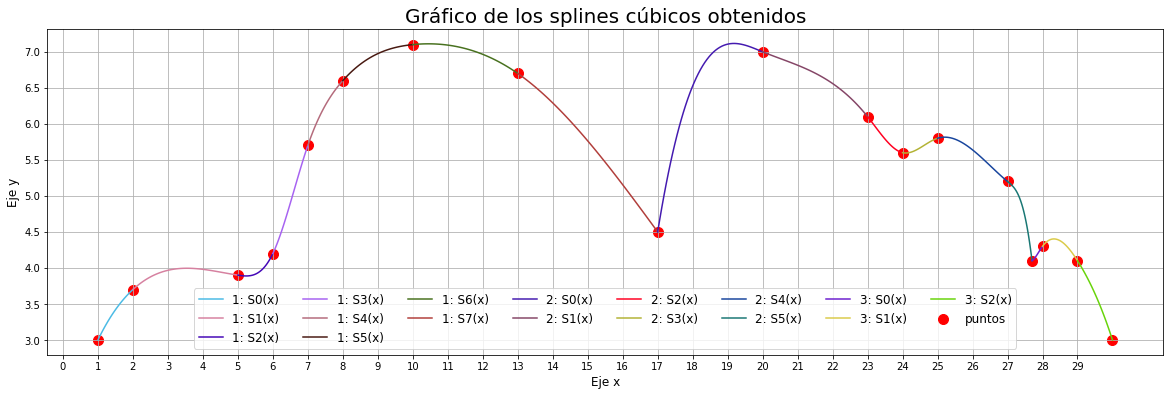

In [ ]:
#tamaño
plt.figure(figsize=(20,6))

#separacion de ejes
plt.xticks(np.arange(0, 30, 1)) 
plt.yticks(np.arange(2, 8, 0.5)) 

#puntos a interpolar
plt.scatter(x_coord, y_coord, label= "puntos", color= "red", marker= "o", s=100) 
    
#____________definición curvas

#curva 1
for i in range(len(x_curva1)-1):
  plt.plot( x[i],
           [(a_curva1[i] +
              b_curva1[i]*(x-x_curva1[i]) +
              c_curva1[i]*(x-x_curva1[i])**2 +
              d_curva1[i]*(x-x_curva1[i])**3
            ) for x in x[i]],
           c=color[i],
           label='''1: S{i}(x)'''.format(i=i)
          )

#curva 2
for j in range(len(x_curva2)-1):
  plt.plot( x[len(x_curva1)-1+j],
          [(  a_curva2[j] +
              b_curva2[j]*(x-x_curva2[j]) +
              c_curva2[j]*(x-x_curva2[j])**2 +
              d_curva2[j]*(x-x_curva2[j])**3
            ) for x in x[len(x_curva1)-1+j]],
           c=color[i+j+1],
           label='''2: S{j}(x)'''.format(j=j)
          )

#curva 3
for k in range(len(x_curva3)-1):
  plt.plot( x[i+j+2+k],
          [(  a_curva3[k] +
              b_curva3[k]*(x-x_curva3[k]) +
              c_curva3[k]*(x-x_curva3[k])**2 +
              d_curva3[k]*(x-x_curva3[k])**3
            ) for x in x[i+j+2+k]],
           c=color[i+j+k+2],
           label='''3: S{k}(x)'''.format(k=k)
          )

#labels
plt.title("Gráfico de los splines cúbicos obtenidos", fontsize=20)
plt.xlabel("Eje x", fontsize=12)
plt.ylabel("Eje y", fontsize=12)
plt.legend(fontsize = "large", ncol=8, loc = "lower center")

plt.grid()
plt.show()

#### $\textrm{Visualizacion curva 1}$

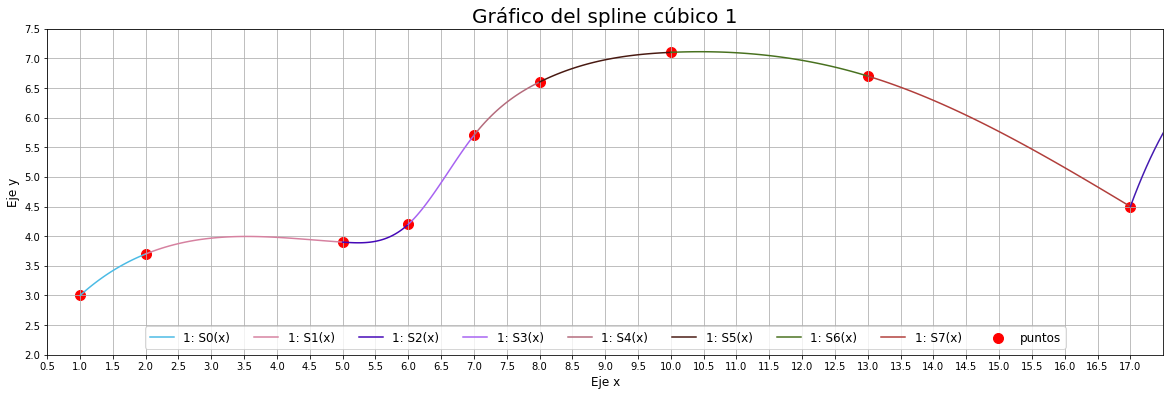

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from sympy import *
import random

#tamaño
plt.figure(figsize=(20,6))
plt.xlim(0.5, 17.5)
plt.ylim(2.5,7.5)

#separacion de ejes
plt.xticks(np.arange(0.5, 17.5, 0.5)) 
plt.yticks(np.arange(2, 8, 0.5)) 

#puntos a interpolar
plt.scatter(x_coord, y_coord, label= "puntos", color= "red", marker= "o", s=100) 

#definición curvas

#curva 1
for i in range(len(x_curva1)-1):
  plt.plot( x[i],
           [( a_curva1[i] +
              b_curva1[i]*(x-x_curva1[i]) +
              c_curva1[i]*(x-x_curva1[i])**2 +
              d_curva1[i]*(x-x_curva1[i])**3
            ) for x in x[i]],
           c=color[i],
           label='''1: S{i}(x)'''.format(i=i)
          )

#curva 2: solo S0
plt.plot(x[len(x_curva1)-1],
         [(a_curva2[0]+b_curva2[0]*(x-x_curva2[0])+c_curva2[0]*(x-x_curva2[0])**2 +d_curva2[0]*(x-x_curva2[0])**3
           ) for x in x[len(x_curva1)-1]],
           c=color[i+1])

#labels
plt.title("Gráfico del spline cúbico 1", fontsize=20)
plt.xlabel("Eje x", fontsize=12)
plt.ylabel("Eje y", fontsize=12)
plt.legend(fontsize = "large",ncol=10, loc = "lower center")

plt.grid()
plt.show()

#### $\textrm{Visualizacion curva 2}$

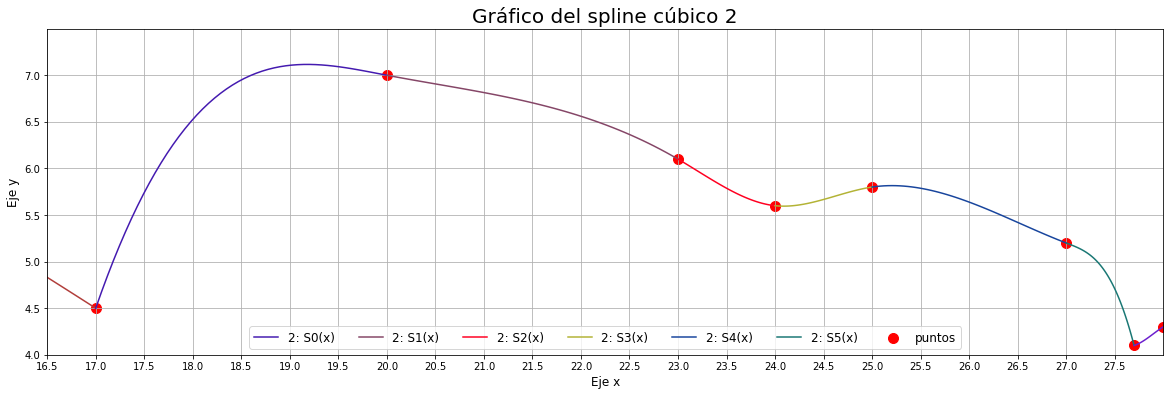

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from sympy import *
import random

#tamaño
plt.figure(figsize=(20,6))
plt.xlim(16.5, 28)
plt.ylim(4,7.5)

#separacion de ejes
plt.xticks(np.arange(16.5, 28, 0.5)) 
plt.yticks(np.arange(4, 7.5, 0.5)) 

#puntos a interpolar
plt.scatter(x_coord, y_coord, label= "puntos", color= "red", marker= "o", s=100) 

#definición curvas

tope = len(x_curva1)-2
#curva 1: solo último Sj
plt.plot(x[tope],
         [(a_curva1[tope]+b_curva1[tope]*(x-x_curva1[tope])+c_curva1[tope]*(x-x_curva1[tope])**2+d_curva1[tope]*(x-x_curva1[tope])**3) for x in x[tope]],
           c=color[tope])

i = tope
#curva 2
for j in range(len(x_curva2)-1):
  plt.plot( x[len(x_curva1)-1+j],
          [(  a_curva2[j] +
              b_curva2[j]*(x-x_curva2[j]) +
              c_curva2[j]*(x-x_curva2[j])**2 +
              d_curva2[j]*(x-x_curva2[j])**3
            ) for x in x[len(x_curva1)-1+j]],
           c=color[i+j+1],
           label='''2: S{j}(x)'''.format(j=j)
           )

#curva 3: solo S0
plt.plot(x[i+j+2],
          [(a_curva3[0]+b_curva3[0]*(x-x_curva3[0])+c_curva3[0]*(x-x_curva3[0])**2+d_curva3[0]*(x-x_curva3[0])**3) for x in x[i+j+2]],
           c=color[i+j+2])

#labels
plt.title("Gráfico del spline cúbico 2", fontsize=20)
plt.xlabel("Eje x", fontsize=12)
plt.ylabel("Eje y", fontsize=12)
plt.legend(fontsize = "large",ncol=10, loc = "lower center")

plt.grid()
plt.show()

#### $\textrm{Visualizacion curva 3}$

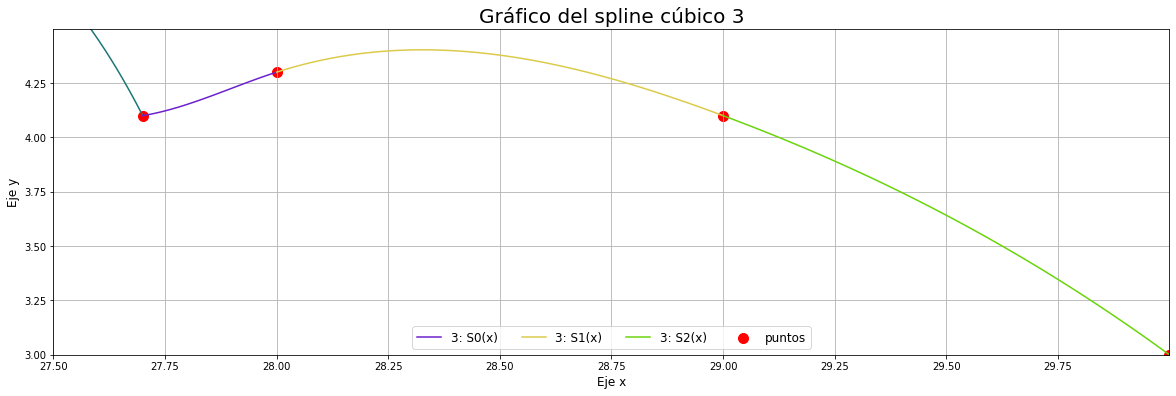

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from sympy import *
import random

#tamaño
plt.figure(figsize=(20,6))
plt.xlim(27.5, 30)
plt.ylim(3,4.5)

#separacion de ejes
plt.xticks(np.arange(27.5, 30, 0.25)) 
plt.yticks(np.arange(3, 4.5, 0.25)) 

#puntos a interpolar
plt.scatter(x_coord, y_coord, label= "puntos", color= "red", marker= "o", s=100) 

#definición curvas

i = len(x_curva1)-2

#curva 2: Solo el último Sj
tope = len(x_curva2)-2
plt.plot( x[len(x_curva1)-1+tope],
          [(a_curva2[tope]+b_curva2[tope]*(x-x_curva2[tope]) +
              c_curva2[tope]*(x-x_curva2[tope])**2 +
              d_curva2[tope]*(x-x_curva2[tope])**3
            ) for x in x[len(x_curva1)-1+tope]],
           c=color[i+tope+1]
           )

#curva 3
for k in range(len(x_curva3)-1):
  plt.plot( x[i+j+2+k],
          [(  a_curva3[k] +
              b_curva3[k]*(x-x_curva3[k]) +
              c_curva3[k]*(x-x_curva3[k])**2 +
              d_curva3[k]*(x-x_curva3[k])**3
            ) for x in x[i+j+2+k]],
           c=color[i+j+k+2],
           label='''3: S{k}(x)'''.format(k=k)
          )

#labels
plt.title("Gráfico del spline cúbico 3", fontsize=20)
plt.xlabel("Eje x", fontsize=12)
plt.ylabel("Eje y", fontsize=12)
plt.legend(fontsize = "large",ncol=10, loc = "lower center")

plt.grid()
plt.show()